In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("consolidated.csv")
data

,Class Year,Degrees,Ethnicity,Gender,ID,Is STEM Degree,STEM Job Within 5 Years
0,2001,B.S. Business Administration 2001,White,F,724202,1.0,NaN
1,2005,B.A. Rhetoric 2005; B.A. Spanish 2005; J.D. La...,Asian,M,729526,0.0,0.0
2,2005,B.S. Bioengineering 2005,Asian,M,732926,1.0,0.0
3,2004,B.S. Nuclear Engineering: Undergrad 2004,Asian,M,746450,1.0,1.0
4,2007,B.A. Classical Languages 2007; M.A. Design 2012,Decline to State,M,754146,0.0,NaN
...,...,...,...,...,...,...,...
7779,2020,B.A. Global Studies 2020,Decline to State,M,3468738,0.0,NaN
7780,2020,B.A. Computer Science 2020,Chicano/Latino,M,3468968,1.0,NaN
7781,2020,B.S. Microbial Biology 2020,Asian,F,3468993,1.0,0.0
7782,2020,B.A. Integrative Biology 2020,Asian,D,3469873,1.0,NaN


In [2]:
grouped = data.groupby(["Ethnicity", "Gender"]).size().reset_index()
grouped = grouped.rename(columns = {0 : "Count"})
grouped
grouped3 = grouped

In [3]:
grouped2 = grouped.drop(columns = "Gender")
grouped2

,Ethnicity,Count
0,African American,110
1,African American,52
2,African American,2
3,Asian,1
4,Asian,2194
5,Asian,1589
6,Asian,40
7,Asian,3
8,Chicano/Latino,456
9,Chicano/Latino,247


<AxesSubplot:xlabel='Ethnicity'>

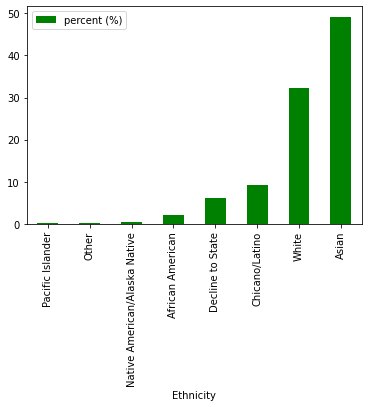

In [5]:
import matplotlib.pyplot as plt
grouped2 = grouped2.groupby(["Ethnicity"]).sum()
grouped2 = grouped2.sort_values(by = "Count")
grouped2 = grouped2.reset_index()
grouped2 = grouped2.set_index("Ethnicity")
#grouped2.plot(kind = "bar", color = "green")
grouped2["sum"] = np.sum(grouped2["Count"])
grouped2["percent (%)"] = (grouped2["Count"] / grouped2["sum"]) * 100
grouped2 = grouped2[["percent (%)"]]
grouped2.plot(kind = "bar", color = "green")

<AxesSubplot:>

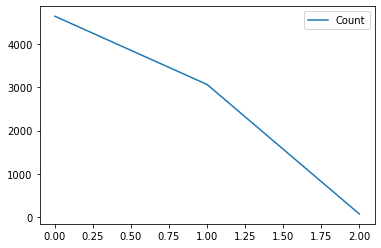

In [6]:
grouped = grouped[(grouped["Gender"] == "M") | (grouped["Gender"] == "F") | (grouped["Gender"] == "U")]
#grouped = grouped.drop(columns = ["Ethnicity"])
grouped = grouped.groupby(["Gender"]).sum()
grouped = grouped.reset_index()
grouped.plot()

In [7]:
grouped = grouped.set_index("Gender")
grouped["sum"] = np.sum(grouped["Count"])
grouped["percent (%)"] = (grouped["Count"] / grouped["sum"]) * 100
grouped = grouped[["percent (%)"]]
grouped

,percent (%)
Gender,
F,59.573100
M,39.372509
U,1.054391


<AxesSubplot:xlabel='Gender'>

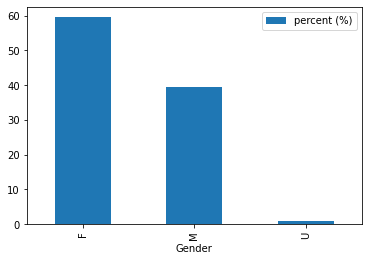

In [8]:
grouped.plot(kind = "bar")

In [8]:
import matplotlib.pyplot as plt

In [9]:
#Count Asian
grouped = grouped3
asian = grouped[grouped["Ethnicity"] == "Asian"]
np.sum(asian["Count"])

3827

In [10]:
#Count White
white = grouped[grouped["Ethnicity"] == "White"]
np.sum(white["Count"])

2520

In [11]:
asian_data = data[data["Ethnicity"] == "Asian"]
asian_data = asian_data.groupby("Class Year").size().reset_index()
asian_data = asian_data.rename(columns = {0 : "Count Asian"})
asian_data = asian_data.drop([0])
asian_data

,Class Year,Count Asian
1,1998,9
2,1999,9
3,2000,18
4,2001,6
5,2002,16
6,2003,26
7,2004,25
8,2005,53
9,2006,76
10,2007,99


In [12]:
white_data = data[data["Ethnicity"] == "White"]
white_data = white_data.groupby("Class Year").size().reset_index()
white_data = white_data.rename(columns = {0 : "Count White"})
white_data

,Class Year,Count White
0,1998,8
1,1999,10
2,2000,23
3,2001,8
4,2002,24
5,2003,33
6,2004,27
7,2005,36
8,2006,51
9,2007,59


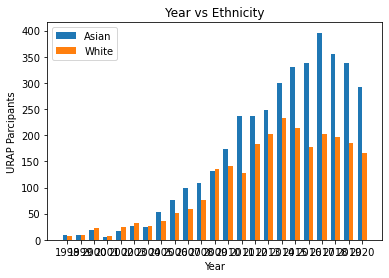

In [13]:
index = np.arange(len(white_data))
bar_width = 0.35
fig, ax = plt.subplots()
asiann = ax.bar(index, asian_data["Count Asian"], bar_width,
                label="Asian")

whitee = ax.bar(index+bar_width, white_data["Count White"],
                 bar_width, label="White")

ax.set_xlabel('Year')
ax.set_ylabel('URAP Parcipants')
ax.set_title('Year vs Ethnicity')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(np.arange(1998, 2021))
ax.legend()
plt.show()

In [14]:
asian_data = data[data["Ethnicity"] == "Asian"]
asian_data2 = asian_data.groupby(["Class Year", "Gender"]).size().reset_index()
asian_data2 = asian_data2.rename(columns = {0 : "Count Asian"})
asian_data2 = asian_data2.drop([0,1])
asian_data2 = asian_data2[(asian_data2["Gender"] == "F") | (asian_data2["Gender"] == "M")]
asian_data2

,Class Year,Gender,Count Asian
2,1998,F,5
3,1998,M,4
4,1999,F,7
5,1999,M,2
6,2000,F,11
7,2000,M,7
8,2001,F,4
9,2001,M,2
10,2002,F,11
11,2002,M,5


In [15]:
white_data = data[data["Ethnicity"] == "White"]
white_data2 = white_data.groupby(["Class Year", "Gender"]).size().reset_index()
white_data2 = white_data2.rename(columns = {0 : "Count White"})
white_data2 = white_data2[(white_data2["Gender"] == "F") | (white_data2["Gender"] == "M")]
white_data2

,Class Year,Gender,Count White
0,1998,F,4
1,1998,M,4
2,1999,F,6
3,1999,M,4
4,2000,F,9
5,2000,M,14
6,2001,F,6
7,2001,M,2
8,2002,F,15
9,2002,M,9


In [16]:
international = pd.read_excel("international_student.xlsx")
international

,Year,International Students,Female,Male,L&S Undeclared,Computer Science,Economics,EECS,Applied Math,Statistics,Business Administration
0,1997,2211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999,2504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2003,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2004,870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005,866,279.0,396.0,138.0,0.0,32.0,75.0,13.0,3.0,26.0
9,2006,852,279.0,372.0,150.0,7.0,36.0,56.0,5.0,5.0,23.0


<function matplotlib.pyplot.show(close=None, block=None)>

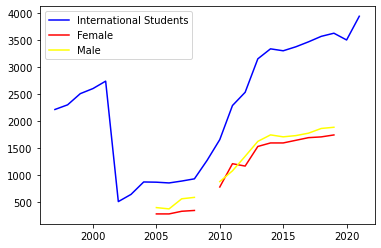

In [17]:
plt.plot('Year', 'International Students', data = international, color = 'blue')
plt.plot('Year', 'Female', data = international, color = 'red')
plt.plot('Year', 'Male', data = international, color = 'yellow')

plt.legend()
plt.show
#plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

In [18]:
import seaborn as sns

In [19]:
asian_data2 = asian_data2.pivot_table(asian_data2, index = "Class Year", columns = ["Gender"], aggfunc = np.sum)
asian_data2

Count Asian     
Gender               F    M
Class Year                 
1998                 5    4
1999                 7    2
2000                11    7
2001                 4    2
2002                11    5
2003                16   10
2004                15   10
2005                25   28
2006                43   33
2007                60   38
2008                56   52
2009                73   58
2010                89   85
2011               135  101
2012               133  100
2013               145  102
2014               175  124
2015               197  133
2016               194  138
2017               231  150
2018               219  128
2019               182  151
2020               165  126

<AxesSubplot:xlabel='Class Year'>

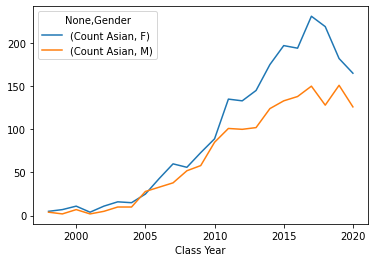

In [20]:
asian_data2.plot()

In [21]:
white_data2 = white_data2.pivot_table(white_data2, index = "Class Year", columns = ["Gender"], aggfunc = np.sum)
white_data2

Count White    
Gender               F   M
Class Year                
1998                 4   4
1999                 6   4
2000                 9  14
2001                 6   2
2002                15   9
2003                24   9
2004                12  15
2005                19  17
2006                28  23
2007                29  30
2008                49  28
2009                82  54
2010                81  60
2011                71  55
2012               104  76
2013               128  73
2014               159  74
2015               119  93
2016               107  68
2017               126  72
2018               125  68
2019               128  54
2020               116  48

<AxesSubplot:xlabel='Class Year'>

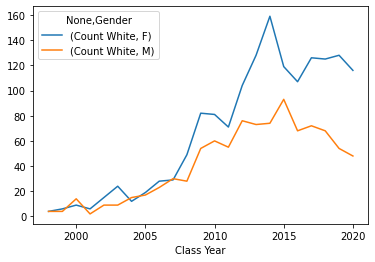

In [22]:
white_data2.plot()

In [23]:
top_degrees_ethnicity = pd.read_csv("top_degrees_ethnicity.csv")
top_degrees_ethnicity

,Degree,African American,Asian,Chicano/Latino,Decline to State,Native American/Alaska Native,Other,Pacific Islander,White
0,Economics,5.0,480.0,25.0,42.0,0.0,2.0,1.0,153.0
1,Political Science,13.0,199.0,72.0,34.0,2.0,0.0,0.0,242.0
2,Computer Science,2.0,376.0,10.0,36.0,1.0,1.0,0.0,80.0
3,Integrative Biology,8.0,261.0,40.0,21.0,6.0,2.0,1.0,164.0
4,Psychology,15.0,167.0,46.0,18.0,1.0,0.0,0.0,157.0
5,Elec. Engr. CS,1.0,302.0,6.0,28.0,0.0,0.0,0.0,52.0
6,Business Administration,2.0,242.0,9.0,31.0,3.0,0.0,0.0,58.0
7,Anthropology,12.0,39.0,60.0,19.0,5.0,1.0,2.0,167.0
8,Public Health,12.0,177.0,22.0,19.0,0.0,0.0,0.0,64.0
9,Statistics,3.0,229.0,6.0,12.0,0.0,0.0,1.0,38.0


In [24]:
top_degrees_gender = pd.read_csv("top_degrees_gender.csv")
top_degrees_gender

,Degree,D,F,M,U,X
0,Economics,0.0,350.0,349.0,8.0,1.0
1,Political Science,0.0,330.0,230.0,2.0,0.0
2,Computer Science,0.0,173.0,320.0,11.0,2.0
3,Integrative Biology,1.0,331.0,164.0,7.0,0.0
4,Psychology,0.0,325.0,76.0,2.0,1.0
5,Elec. Engr. CS,0.0,62.0,320.0,7.0,0.0
6,Business Administration,0.0,207.0,137.0,0.0,1.0
7,Anthropology,0.0,220.0,80.0,5.0,0.0
8,Public Health,0.0,231.0,61.0,2.0,0.0
9,Statistics,0.0,132.0,149.0,8.0,0.0


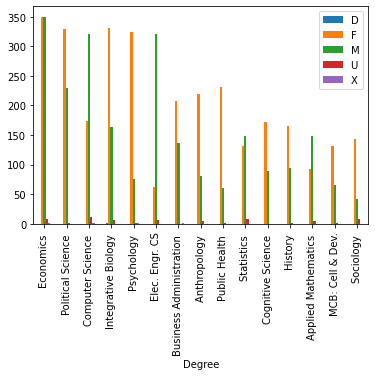

In [34]:
top_degrees_gender.set_index("Degree").plot(kind = "bar")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Degree'>

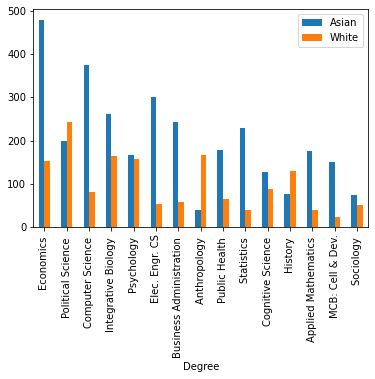

In [26]:
top_degrees2 = top_degrees_ethnicity[['Degree', 'Asian', 'White']]
top_degrees2.set_index("Degree").plot(kind = "bar")

<AxesSubplot:xlabel='Year'>

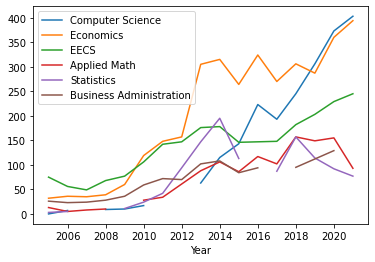

In [27]:
international.drop(columns = ["International Students", "Female", "Male", "L&S Undeclared"]).set_index("Year").plot()

In [28]:
#See if there is a correlation between major of international students with urap participants
#Focus on certain years, that we have all the data

<AxesSubplot:xlabel='Is STEM Degree'>

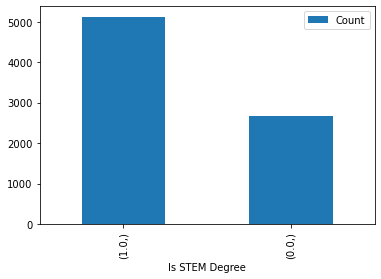

In [29]:
#data = data[["Class Year", "Degrees"]]
#computer_science = data[data["Degrees"].str.extract(r'^Computer')]
stem_non = data[["Is STEM Degree"]]
stem_non = stem_non.value_counts()
stem_non = pd.DataFrame(stem_non)
stem_non = stem_non.rename(columns = {0 : 'Count'})
stem_non.plot(kind = "bar")

<AxesSubplot:xlabel='STEM Job Within 5 Years'>

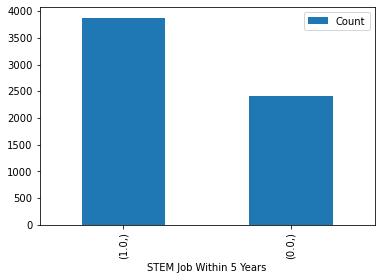

In [30]:
stem_job = data.dropna(subset=["STEM Job Within 5 Years"])
stem_job = data[["STEM Job Within 5 Years"]]
stem_job = stem_job.value_counts()
stem_job = pd.DataFrame(stem_job)
stem_job = stem_job.rename(columns = {0 : 'Count'})
stem_job.plot(kind = 'bar')

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (23).

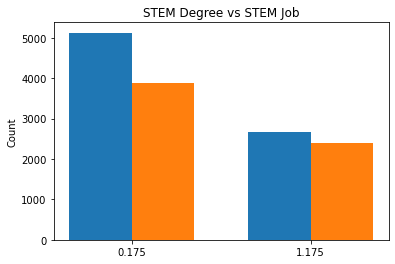

In [31]:
index = np.arange(len(stem_job))
bar_width = 0.35
fig, ax = plt.subplots()
asiann = ax.bar(index, stem_non["Count"], bar_width,
                label="Asian")

whitee = ax.bar(index+bar_width, stem_job["Count"],
                 bar_width, label="White")

ax.set_xlabel('')
ax.set_ylabel('Count')
ax.set_title('STEM Degree vs STEM Job')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(np.arange(1998, 2021))
ax.legend()
plt.show()

<AxesSubplot:>

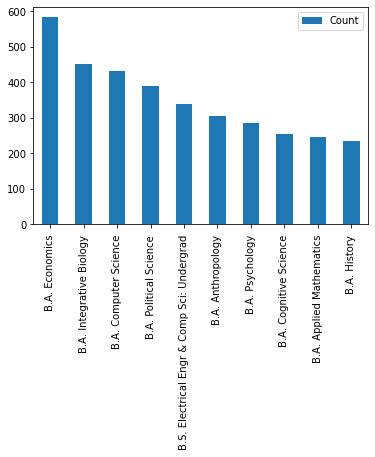

In [35]:
data["Degrees Name"] = data["Degrees"].str.extract("([^0-9\n]+)")
dt_degree = data["Degrees Name"].value_counts()
dt_degree = pd.DataFrame(dt_degree)
dt_degree = dt_degree.sort_values(by = ["Degrees Name"], ascending = False).iloc[0:10]
dt_degree = dt_degree.rename(columns = {"Degrees Name" : "Count"})
dt_degree.plot(kind = "bar")

In [36]:
new_data = data[data["Class Year"] >= 2013]
international = international[international["Year"] >= 2013]

In [70]:
new_dt_degree = new_data[['Degrees Name', 'Class Year', 'ID']].groupby(by = ["Class Year", "Degrees Name"]).count()
new_dt_degree = new_dt_degree.sort_values(by = ["ID"], ascending = False)
new_dt_degree = new_dt_degree.rename(columns = {"Degrees Name" : "Count"})
new_dt_degree = new_dt_degree.reset_index()
new_dt_degree = new_dt_degree.set_index("Class Year")
new_dt_degree

,Degrees Name,ID
Class Year,,
2019,B.A. Computer Science,84
2018,B.A. Computer Science,83
2020,B.A. Computer Science,73
2018,B.A. Economics,69
2017,B.A. Computer Science,64
...,...,...
2017,B.A. German,1
2017,B.A. Geophysics,1
2017,B.A. Film,1


In [39]:
gpa = pd.read_excel("Apprentices Archive.xlsx")


,Project Term,Last Name,First Name,Standing,Transfer,gpa
0,Fall 2012,DiRocco,Alyson,Sophomore,NaN,3.707
1,Fall 2012,Aung,Kelvin,Junior,NaN,3.387
2,Fall 2012,Vancil,Stephanie,Junior,NaN,3.469
3,Fall 2012,Osadchiy,Vadim,Freshman,NaN,4.0
4,Fall 2012,Vassalo,Brian,Senior,Fall 11,3.533
...,...,...,...,...,...,...
16217,Spring 2021,Wright,Cameron,Sophomore,NaN,3.8
16218,Spring 2021,Arnst,Matthew,Junior,NaN,3.6
16219,Spring 2021,Nath,Utkarsh,Junior,NaN,3.8
16220,Spring 2021,Roy,Abhishek,Junior,NaN,3.4


In [97]:
gpa2 = gpa[['Project Term', 'gpa']]
gpa2["Year"] = gpa2["Project Term"].str.extract(r'(\d{4})')
gpa2 = gpa2.drop(columns = "Project Term")
#gpa3 = gpa2.groupby(by = 'Year').mean()
gpa2["gpa"] = gpa2["gpa"].replace({"-": np.nan, "X":np.nan, "6.8/7":np.nan, "~3.5":3.5, "2,1*": np.nan, "x":np.nan, "3/3.6":np.nan, "UC3.2": 3.2, "3.7kr": np.nan})
gpa2 = gpa2["gpa"].astype(float)
gpa2

<ipython-input-97-68e06079e42d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpa2["Year"] = gpa2["Project Term"].str.extract(r'(\d{4})')


ValueError: could not convert string to float: '3,662'

In [40]:
merged = pd.read_csv("merged_data.csv")
merged

,ID,Full Name,Gender,Class Year,Asian,White,Non_W/A,Total_degree,STEM_Degree,STEM_Job_in_5Yrs,Standing,Transfer_or_not,gpa
0,962822,Stephanie Bonds,1,2012,0,1,0,2,0.0,0.0,4.0,0,3.540
1,1004921,Xiang Cheng,0,2013,1,0,0,2,1.0,1.0,4.0,0,3.980
2,1005434,Evan Pranoto,0,2014,1,0,0,2,1.0,0.0,3.0,0,3.951
3,1013220,Daniela Molinaro,1,2014,0,0,1,2,1.0,1.0,3.0,0,3.480
4,3010681,Collin Gallagher,0,2014,0,1,0,3,1.0,1.0,2.0,0,3.843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,3165764,Trevor Greenan,0,2018,0,0,1,2,0.0,0.0,4.0,0,3.600
2062,3168522,Nur Amanina Shofry,1,2018,1,0,0,1,1.0,0.0,2.0,0,3.500
2063,3195110,Lynn Ma,1,2018,1,0,0,1,0.0,0.0,4.0,0,3.600
2064,3262093,Royce Buell,0,2018,1,0,0,2,0.0,0.0,4.0,1,3.698


In [41]:
total = data.merge(merged, on = "ID")
total = total.drop(columns = ["Degrees", "Ethnicity", "Is STEM Degree", "STEM Job Within 5 Years", "Full Name", "Gender_y", "Class Year_y"])
total = total.rename(columns = {"Gender_x" : "Gender", "Class Year_x" : "Class Year"})
total = total.set_index("ID")
total

,Class Year,Gender,Degrees Name,Asian,White,Non_W/A,Total_degree,STEM_Degree,STEM_Job_in_5Yrs,Standing,Transfer_or_not,gpa
ID,,,,,,,,,,,,
962822,2012,F,B.A. Economics,0,1,0,2,0.0,0.0,4.0,0,3.540
1004921,2013,M,B.S. Electrical Engr & Comp Sci: Undergrad,1,0,0,2,1.0,1.0,4.0,0,3.980
1005434,2014,M,B.A. Economics,1,0,0,2,1.0,0.0,3.0,0,3.951
1013220,2014,F,B.A. Media Studies,0,0,1,2,1.0,1.0,3.0,0,3.480
3010681,2014,M,B.S. Business Administration,0,1,0,3,1.0,1.0,2.0,0,3.843
...,...,...,...,...,...,...,...,...,...,...,...,...
3165764,2018,M,B.A. Rhetoric,0,0,1,2,0.0,0.0,4.0,0,3.600
3168522,2018,F,B.S. Society & Environment,1,0,0,1,1.0,0.0,2.0,0,3.500
3195110,2018,F,B.A. Political Science,1,0,0,1,0.0,0.0,4.0,0,3.600


array([[<AxesSubplot:title={'center':'gpa'}>]], dtype=object)

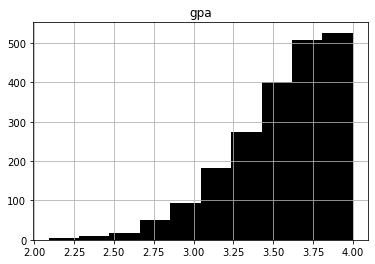

In [104]:
total2 = total[["Class Year", "gpa"]]
total2.hist("gpa", color = "black")

In [107]:
total3 = total[["Class Year", "gpa"]]
total3 = total3.reset_index()
total3 = total3.drop(columns = "ID")
total3

,Class Year,gpa
0,2012,3.540
1,2013,3.980
2,2014,3.951
3,2014,3.480
4,2014,3.843
...,...,...
2061,2018,3.600
2062,2018,3.500
2063,2018,3.600
2064,2018,3.698


<AxesSubplot:xlabel='Class Year'>

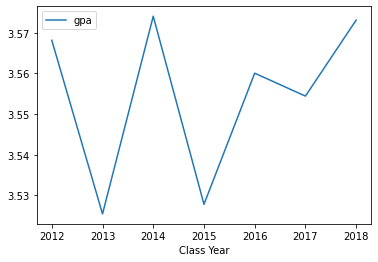

In [109]:
total3 = total3.groupby(by = "Class Year").mean()
total3.plot(color)

In [42]:
grouped_total = total[["Degrees Name", "gpa"]].groupby(["Degrees Name"]).mean()
grouped_total = grouped_total.sort_values(by = "gpa", ascending = False)
grouped_total

,gpa
Degrees Name,
B.S. EECS & Nuclear Engr,4.0000
ATU Political Science,4.0000
B.A. Spanish,4.0000
B.S. Engr Math & Statistics,4.0000
ATU Anthropology,3.9300
...,...
B.A. South & SE Asian Studies,3.0110
B.S. Nuclear Engineering: Undergrad,2.9420
B.A. Environmental Earth Science,2.8842


In [43]:
temp = grouped_total.iloc[0:10]
temp = temp.reset_index()

In [44]:
temp

,Degrees Name,gpa
0,B.S. EECS & Nuclear Engr,4.000000
1,ATU Political Science,4.000000
2,B.A. Spanish,4.000000
3,B.S. Engr Math & Statistics,4.000000
4,ATU Anthropology,3.930000
5,B.A. Middle Eastern Studies,3.875000
6,B.S. Chemical Engr & Material Sci & Engr,3.861000
7,B.A. Philosophy,3.805000
8,B.S. Energy Engineering,3.800000
9,B.A. Gender & Women's Studies,3.792143


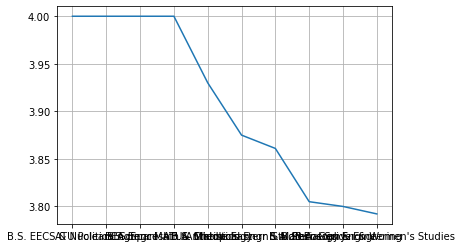

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.plot(temp["Degrees Name"], temp["gpa"])

In [46]:
grouped_total2 = total[["Transfer_or_not", "gpa"]].groupby(["Transfer_or_not"]).mean()
grouped_total2 = grouped_total2.sort_values(by = "gpa", ascending = False)
grouped_total2

,gpa
Transfer_or_not,
1,3.673141
0,3.530285


<AxesSubplot:>

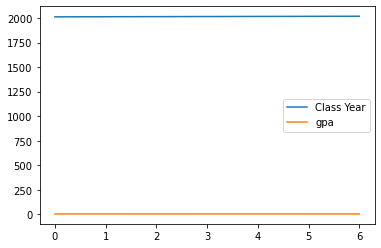

In [47]:
grouped_total3 = total[["Class Year", "gpa"]].groupby(["Class Year"]).mean()
grouped_total3 = grouped_total3.reset_index()
grouped_total3 = grouped_total3.sort_values(by = "Class Year")
grouped_total3.plot()

In [57]:
grouped_total4 = total[["Gender", "gpa"]].groupby(["Gender"]).mean()
grouped_total4 = grouped_total4.sort_values(by = "gpa", ascending = False)
grouped_total4

,gpa
Gender,
M,3.581259
F,3.539677
